In [1]:
import warnings
warnings.filterwarnings('ignore')

# Classification basics

Here we will focus on **Classification** problems - which means:
- **supervised** learning (with labeled data)
- with **categorical data** (as opposed to Regression problems which work on quantitative data)

# I. A Classification Problem

Suppose you want to classify data points between 2 labels, e.g. predict a customer churn for Netflix. A churner is a customer who resigned his subscription.

Netflix already has a large database of users with past churners.

We would have what we call our **features $X = (x_1, x_2...)$** for many customers, e.g.:
- $x_1$: The subscrition plan
- $x_2$: The number of profiles
- $x_3$: The number of watched movies in the past month
- $x_4$: The average number of watched movies per month in the past year
- $x_5$: The subscription date
- ...

And we would have **labels y**, sometimes called **target** or **ground truth**:
- The churn status of the customer, we here have **two classes**: True or False, (i.e. 1 or 0)

This is a typical **binary classification** problem.

We would like to use machine learning to solve it efficiently.

### Notation

We will need at some point to have a notation for our customers, let's use the superscript $^{(i)}$ for a customer $i$:

- $X^{(i)}$ are all the features of customer $i$
- $y^{(i)}$ is the label of customer $i$
- $x^{(i)}_j$ is the feature $j$ or customer $i$

A set a features $X^{(i)}$ is commonly called a **sample** or an **observation**.

## There are many ML classification models - with specificities

Suppose you want to classify data points between 2 labels, e.g. predict a customer churn.

There are various Machine Learning **models**. They all have differences and may output different prediction.

<img src="https://cdn-images-1.medium.com/max/2000/1*M6djHnMzmTu4c0CN58Dxpg.png" width="900px" align="center"/>



Let's explore one of the most classical ML classification models: the **Logistic Regression**

# II. Logistic Regression

How does the logistic regression work?

Just like a linear regression, it will apply **parameters $\theta = (\theta_1, \theta_2...)$** to each feature $(x_1, x_2...)$ as a **weighted sum** (or a scalar product). Those parameters $\theta$ can be seen as the **weights** of each feature $j$:

$$
\theta \cdot X = \sum_j \theta_j \times x_j
$$

We will then just add one more parameter, a **bias $b$**, sometimes noted $\theta_0$, so that we have the following formula:

$$
z = \sum_j \theta_j \times x_j + b = \theta \cdot X + b
$$

Then the **logistic function** (a.k.a. sigmoid) is applied to $z$, such that:

$$
h_{\theta}(x) = \frac{1}{1+e^{-z}} = \frac{1}{1+e^{-(\theta \cdot X + b)}}
$$

Just to give an idea, the logisitic function looks like that:

<center><img src="images/logistic_curve.png" width="600"></center>


As a consequence, the values of $h_{\theta}(x)$ are between 0 and 1. Even better, it can be **interpreted as a probability**.

We can then apply a threshold to perform a class prediction $\hat{y}$ (churner or not churner):

$$
\hat{y} = 1 \text{ if } h_{\theta}(x) > 0.5 \text{ (i.e. Churner)}
$$

$$
\hat{y} = 0 \text{ otherwise (i.e. Not churner)}
$$

This allows to predict a class $\hat{y}$ from a given set of features X.

But how to find the right parameters $\theta$ making the right prediction?

## Cross entropy loss

How to train a logistic regression?

Meaning, how to find the parameters $\theta$ that give the best prediction?

First, we have to define a **loss** $\mathcal{L}$ to minimize.

The loss is also called the **error**, or **cost function** depending on the context.

The most usual loss for binary classification is the **binary cross entropy** loss:

$$
\large \mathcal{L} = - y\,\log(h_{\theta}(x))\,-\,(1-y)\log (1 - h_{\theta}(x))
$$

Basically, we can split it in 4 extreme cases:

- if y = 1 and $h_{\theta}(x)$ $\simeq 1$ : $\mathcal{L} << 1$

- if y = 0 and $h_{\theta}(x)$ $\simeq 0$ : $\mathcal{L} << 1$

- if y = 1 and $h_{\theta}(x)$ $\simeq 0$ : $\mathcal{L} >> 1$

- if y = 0 and $h_{\theta}(x)$ $\simeq 1$ : $\mathcal{L} >> 1$


![](images/BCE.jpg)

Thus, minimizing this loss function will ensure a good classification.

In real life, we have not one, but many **samples** on which we want to optimize our classification.

The loss will will then be written as:

$$
\mathcal{L} = -\frac{1}{m} \sum_{i=1}^m y^{(i)}\,\log(h_{\theta}(x^{(i)}))\,+\,(1-y^{(i)})\log (1 - h_{\theta}(x^{(i)}))
$$

Where:
- $(i)$ is a sample: in our customer churn example, **a sample is just a customer** in the database.
- $m$ is the number of samples, so the number of customers in the database.

## Gradient descent

Finally, we want to find the $\theta$ parameters that minimize our loss:

$$
\displaystyle \min_{\theta} \mathcal{L} = \min_{\theta}-\frac{1}{m} \sum_{i=1}^m y^{(i)}\,\log(h_{\theta}(x^{(i)}))\,+\,(1-y^{(i)})\log (1 - h_{\theta}(x^{(i)}))
$$

A visual representation would be to try to go down a valley, the valley being our loss function:

<center><img src="https://drive.google.com/uc?export=view&id=1Q0NwocOMQUKV2uOl08bRAZupMfaD8y6V"></center>


> How would find those optimal parameters $\theta$ that minimize our loss?

We can do it iteratively:

Imagine you are hiking in a mountain with heavy fog around you. How can you try to get to the bottom of the valley?

At each step, just look around you and **go in the direction that makes you go down the most**.

Here we can do the same:
- We observe around us which direction makes us go down the most
- We take a step towards this direction and update our model with the new parameters
- Then we iterate until convergence or a max iteration number is reached

<center>
  <img src="https://drive.google.com/uc?export=view&id=1KW7E9OIDoHYTxrsuTso7Vng0Eky_Q7Tg" width="300"/>
</center>

This is called the **Gradient Descent** algorithm.

Mathematically, this just means that we compute the partial derivative of the function for all $\theta_j$:

$$
d\theta_j =\frac{\partial}{\partial\theta_j}\mathcal{L} = (y - h_{\theta}(x)) x_j
$$

This will show us the direction that goes down the most.

Then we update our model parameters:
$$
\displaystyle \theta_j = \theta_j - \alpha\frac{\partial}{\partial\theta_j}\mathcal{L} = \theta_j - \alpha d\theta_j
$$

Meaning, we take a step toward this direction and update our model accordingly.


The newly introduced parameter $\alpha$ is called the **learning rate**. The learning rate will control the size of the steps.

Finally, step by step, we may eventually reach the global minimum of our loss function.

## Learning Curve

We expect the loss the decrease step by step. A way to check if the model is learning well, is to plot the **learning curve**.

The learning curve is a plot with the **loss as a function of the iteration** in the gradient descent.

> N.B.: There actually exist several forms of learning curves

Here is a learning curve on a real dataset, with logistic regression:

<center><img src="images/learning_curve.png" width="400"></center>

The loss decreases strongly in the first ~30 iterations (with some bumps), and then reaches a plateau.

> Not all learning curves have this shape, some decreases slowly, some are very noisy...

# III. Multiclass Classification

The logistic regression allows to perform **binary classification**. This is useful for problems such as customer churn, or tumor detection. 

But what if we have more than 2 classes, e.g. predicting an email category among 3 classes:
- Spam
- Work
- Personal

How would you do that using logistic regression?

We can train three models, classifying the following:
- **model S**: Spam against Work and Personal
- **model W**: Work against Spam and Personal
- **model P**: Personal against Spam and Work

Then we would keep the highest score of the three models as the prediction.

For example:
- model S: $h_{\theta}(x)$ = 0.4
- model W: $h_{\theta}(x)$ = 0.2
- model P: $h_{\theta}(x)$ = 0.3

Then we would predict Spam email. This method is called **One versus Rest** classification, sometimes just called OvR.

# IV. Example of Iris classification with scikit-learn

<center>
    <img src="images/sklearn_logo.png" width=400>
</center>

Probably the most widely used package for machine learning, scikit-learn has a lot of defined models and tools, for various applications:
- Classification: SVM, k-NN, Logistic Regression, Random Forest…
- Regression: Linear regression, Ridge regression, LASSO...
- Clustering: k-means...
- Dimensionality Reduction: PCA, t-SNE...


## IV.1. The iris dataset

Iris dataset is a very standard and famous dataset for training.

It has 4 features about flowers:
- Sepal length
- Sepal width
- Petal length
- Petal width

And 3 classes, types of flowers:
- Setosa
- Virginica
- Versicolor

So this is a **multiclass classification**.

![](images/iris_dataset.jpeg)

We first load the dataset:

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
X = data['data']
y = data['target']
print('X features:', data['feature_names'])
print('y labels:', data['target_names'])

X features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
y labels: ['setosa' 'versicolor' 'virginica']


How many features and samples do we have?

In [3]:
X.shape

(150, 4)

> We have 150 samples and 4 features.

We can visualize the data if needed:

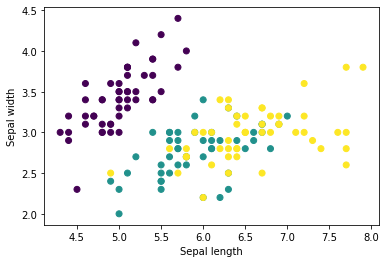

In [4]:
from matplotlib import pyplot as plt
# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y)
# Format chart
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

## IV.2. Train a logistic regression model

The logistic regression model is available in scikit-learn. 

Scikit-learn is probably the most widely used machine learning library at the moment. Most machine learning algorithms are available, well documented, and really easy to use.

The logistic regression model is available with the following signature:
```python
sklearn.linear_model.LogisticRegression()
```

Then the code is always the same:
- Import the model: `from sklearn.linear_model import LogisticRegression`
- Instantiate a model, e.g.: `lr_model = LogisticRegression()`
- Fit the model on data, e.g.: `lr_model.fit(X, y)`
- Predict, e.g.: `lr_model.predict(X)`

In [5]:
# We import and instantiate the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

Then we fit the model to our data X and y with the `.fit(X, y)` method:

In [6]:
lr.fit(X, y)

LogisticRegression()

We can then get predictions from our model with the `.predict(X)` method:

In [7]:
y_pred = lr.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

And finally we can evaluate the **accuracy** of our model: this is just the number of good predictions over total number of predictions

In [8]:
accuracy = lr.score(X, y)

print("Logistic regression accuracy:", accuracy)

Logistic regression accuracy: 0.9733333333333334


## IV.3. Interpretation

Having a good model is important: the main goal of a model is most of the time to perform well.

But having a model that we **can explain** is even better. How to make an interpretation of our model? 

We can use the parameters $\theta_j$, associated to our features $x_j$.

Indeed, the parameters $\theta$ are just weights, applied to each feature:
- a very small weight would mean a feature of low importance
- a large, positive weight would mean a strong, positive correlation between the feature and the label
- a large, negative weight would mean a strong, negative correlation between the feature and the label

Those weights are available in scikit-learn, after training the `LogisticRegression` model, with the attribute `.coef_`.

Since we have a 3-class classification, we have a list of weights for each of those class (remember the *One versus Rest* method).

For predicting class `setosa`, we have the following values:

In [9]:
import pandas as pd

pd.DataFrame([lr.coef_[0]], columns=data['feature_names'])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.41821,0.966365,-2.520913,-1.084117


Meaning that the most important feature for this task, with this model, is `petal length`.

The less important feature here would be `sepal length`.

## IV.4. [Optional] Learning curve

We can actually plot the learning curve we saw above in the course, with the following code:

In [10]:
from sklearn.metrics import log_loss

# Save the loss in a list
loss = []
# Look for 100 iterations
for i in range(100):
    lr = LogisticRegression(max_iter=i+1)
    lr.fit(X, y)
    y_pred_prob = lr.predict_proba(X)
    loss.append(log_loss(y, y_pred_prob))

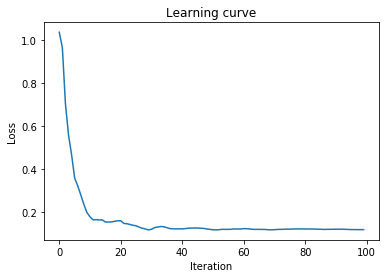

In [11]:
import matplotlib.pyplot as plt
# Plot the loss
plt.plot(loss)
plt.title('Learning curve')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

# V. Other classification models

There exist many classification models. Let's quickly review some of the most frequently used and their scikit-learn implementations.

## V.1. k-NN

k-NN stands for k nearest neighboors.

The idea is the following:
- Given a test sample, the `k` nearest points in the train dataset are found
- Within the `k` nearest points, the majority class is the prediction class

<center>
    <img src='images/knn_classification.png'>
</center>

The implementation with scikit-learn is with the following class:
```python
class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
```

Where `n_neighbors` is the number `k` of nearest neighboors to take.

In practice, k-NN is not very used and is rarely a powerful model.

## V.2. Support Vector Machine

Support Vector Machine is a classifying algorithm that was very popular back in the 90s and early 2000s.

The main idea is to maximize the margin that separates the classes.

<center>
    <img src='images/SVM_margin.png' width=500>
</center>

### The use of a kernel

In SVM, is it possible to perform **non linear classification** using a kernel. Thanks to a kernel, non linear separation of the data can be achieved.

The implementation is scikit-learn is in the following class:
```python
class sklearn.svm.SVC(kernel='rbf')
```
Here are among the most widely used kernels:
- `'linear'` (i.e. no kernel)
- `'poly'` for a polynomial kernel
- `'rbf'` for a [radial basis kernel](https://en.wikipedia.org/wiki/Radial_basis_function_kernel)
- `'sigmoid'` for a sigmoid kernel

## V.3. Naive Bayes

**Naive Bayes classifier** is based on [Bayes' theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem).

This algorithm is designed as 'naive' because is assumes a strong independance between the input features. It is for example used in [spam filtering](https://en.wikipedia.org/wiki/Naive_Bayes_spam_filtering).


It is available in scikit-learn with the following class:

```python
sklearn.naive_bayes.GaussianNB()
```

## V.4. What model to choose?

What model to use?

There is no rule working all the time. The best way to know what model performs the best, evaluating both is the safely way to have the answer.

Although, some rules may help in some cases. Let's consider a case with `m` samples and `n` features:

| Case | What model to use? |
|:--:|:--:|
| n large and n >> m | Logistic Regression or SVM with linear kernel |
| n small, m intermediate | SVM with RBF kernel |
| m large and m >> n | Feature engineering, then Logistic Regression or SVM with linear kernel |

- Small $\simeq$ 10 - 100
- Medium $\simeq$ 100 - 10000
- Large > 10000

___

In [12]:
# Attach the dataset to the environment
data(iris)
# Rename the data
iris_dataset<-iris
# View the data
head(iris_dataset)

NameError: name 'iris' is not defined

How many samples do we have?

In [ ]:
dim(iris_dataset)

We have 150 samples.

In [ ]:
library(ggplot2)
g <- ggplot(data=iris_dataset, aes(x = Petal.Length, y = Petal.Width))
g <-g + 
    geom_point(aes(color=Species, shape=Species)) +
    xlab("Petal Length") +
    ylab("Petal Width") +
    ggtitle("Petal Length-Width")
print(g)

Let's **train our model** on the data:

In [ ]:
model <- glm(Species ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width,
             data = iris_dataset,
             family = binomial)

Have a look at the model:

In [ ]:
model

In [ ]:
predict(model, type='response')

In [ ]:
glfit<-glm(y~x, family = 'binomial')